<a href="https://colab.research.google.com/github/Lorenp95/Proyecto-Final-Bootcamp/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL BOOTCAM

1. Importacion de las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Lectura del Dataset constituido por el Parque Automotor Registrado en el Departamento de Boyaca con el cual queremos identificar si distribucion del transporte particular en todo el Departamento destacando municipios puntuales.

In [2]:
df = pd.read_csv('/content/Parque_Automotor_activo_de_servicio_particular_-_DEPARTAMENTO_DE_BOYAC__20240520.csv')

In [3]:
df.head()

,MUNICIPIO,CLASE,MARCA,LINEA,MODELO,CARROCERIA,PASAJEROS,TONELAJE,CILINDRAJE,SERVICIO,ESTADO,BLINDAJE,IMPORTADO,PUERTAS
0,COMBITA,CAMIONETA,CHEVROLET,SIN LINEA,1951,PANEL,0.0,1.00,2500.0,PARTICULAR,ACTIVO,N,N,2.0
1,SOGAMOSO,AUTOMOVIL,CHEVROLET,IMPALA,1959,COUPE,5.0,0.00,2400.0,PARTICULAR,ACTIVO,N,S,2.0
2,PAIPA,CAMIONETA,MERCURY,SIN LINEA,1950,ESTACA,0.0,1.00,1.0,PARTICULAR,ACTIVO,N,N,2.0
3,TUNJA,CAMPERO,JEEP WILLYS,STATION WAGON,1964,STATION WAGON,5.0,0.00,2400.0,PARTICULAR,ACTIVO,N,N,2.0
4,SANTA ROSA DE VITERBO,CAMIONETA,PLYMOUHT,VALIANT,1955,ESTACA,5.0,0.75,2200.0,PARTICULAR,ACTIVO,N,N,2.0


3. Verificacion de valores Nulos de Nuestro Dataset

In [4]:
# Verificamos si hay valores nulos
print(df.isnull().sum())

MUNICIPIO          0
CLASE             61
MARCA             12
LINEA           3508
MODELO             0
CARROCERIA      3684
PASAJEROS        159
TONELAJE        3955
CILINDRAJE       106
SERVICIO           0
ESTADO             0
BLINDAJE      101384
IMPORTADO     111104
PUERTAS       109843
dtype: int64


4. Eliminacion de valores Nulos y Reemplazo de dichos valotres nulos

In [5]:
# Eliminamos valores nulos dos filas especificas
df.dropna(subset=['CLASE', 'MARCA'], inplace=True)

In [6]:
# Realizamos un remplazo de valores Nulos
df['LINEA'].fillna('SIN LINEA', inplace=True)
df['CARROCERIA'].fillna('NO APLICA', inplace=True)
df['PASAJEROS'].fillna(0, inplace=True)
df['TONELAJE'].fillna(0, inplace=True)
df['CILINDRAJE'].fillna(0, inplace=True)
df['BLINDAJE'].fillna('N', inplace=True)
df['IMPORTADO'].fillna('No hay Informacion', inplace=True)
df['PUERTAS'].fillna(0, inplace=True)

In [7]:
# Verfificamos que ya no existan valore nulos
print(df.isnull().sum())

MUNICIPIO     0
CLASE         0
MARCA         0
LINEA         0
MODELO        0
CARROCERIA    0
PASAJEROS     0
TONELAJE      0
CILINDRAJE    0
SERVICIO      0
ESTADO        0
BLINDAJE      0
IMPORTADO     0
PUERTAS       0
dtype: int64


5. Estandarizacion de valores segun su tipo

In [8]:
# Convertir a tipos de datos correctos

df['PASAJEROS'] = df['PASAJEROS'].astype(int)
df['TONELAJE'] = df['TONELAJE'].astype(float)
df['CILINDRAJE'] = df['CILINDRAJE'].astype(int)
df['PUERTAS'] = df['PUERTAS'].astype(int)
df['MODELO'] = pd.to_datetime(df['MODELO'].astype(str), format='%Y', errors='coerce')
df['MODELO'] = df['MODELO'].dt.year


In [9]:
# Eliminar valores numéricos de columnas con valores String
df = df[~df['MARCA'].str.isnumeric()]
df = df[~df['CLASE'].str.isnumeric()]

6. Verificacion de la limpieza y estandarizacion de los datos


In [10]:
# Verificar la conversión
print(df.head())

               MUNICIPIO      CLASE        MARCA          LINEA  MODELO  \
0                COMBITA  CAMIONETA    CHEVROLET      SIN LINEA    1951   
1               SOGAMOSO  AUTOMOVIL    CHEVROLET         IMPALA    1959   
2                  PAIPA  CAMIONETA      MERCURY      SIN LINEA    1950   
3                  TUNJA    CAMPERO  JEEP WILLYS  STATION WAGON    1964   
4  SANTA ROSA DE VITERBO  CAMIONETA     PLYMOUHT        VALIANT    1955   

      CARROCERIA  PASAJEROS  TONELAJE  CILINDRAJE    SERVICIO  ESTADO  \
0          PANEL          0      1.00        2500  PARTICULAR  ACTIVO   
1          COUPE          5      0.00        2400  PARTICULAR  ACTIVO   
2         ESTACA          0      1.00           1  PARTICULAR  ACTIVO   
3  STATION WAGON          5      0.00        2400  PARTICULAR  ACTIVO   
4         ESTACA          5      0.75        2200  PARTICULAR  ACTIVO   

  BLINDAJE IMPORTADO  PUERTAS  
0        N         N        2  
1        N         S        2  
2        N    

In [11]:
df

,MUNICIPIO,CLASE,MARCA,LINEA,MODELO,CARROCERIA,PASAJEROS,TONELAJE,CILINDRAJE,SERVICIO,ESTADO,BLINDAJE,IMPORTADO,PUERTAS
0,COMBITA,CAMIONETA,CHEVROLET,SIN LINEA,1951,PANEL,0,1.00,2500,PARTICULAR,ACTIVO,N,N,2
1,SOGAMOSO,AUTOMOVIL,CHEVROLET,IMPALA,1959,COUPE,5,0.00,2400,PARTICULAR,ACTIVO,N,S,2
2,PAIPA,CAMIONETA,MERCURY,SIN LINEA,1950,ESTACA,0,1.00,1,PARTICULAR,ACTIVO,N,N,2
3,TUNJA,CAMPERO,JEEP WILLYS,STATION WAGON,1964,STATION WAGON,5,0.00,2400,PARTICULAR,ACTIVO,N,N,2
4,SANTA ROSA DE VITERBO,CAMIONETA,PLYMOUHT,VALIANT,1955,ESTACA,5,0.75,2200,PARTICULAR,ACTIVO,N,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170735,SOGAMOSO,CAMIONETA,CHEVROLET,C.A.D.C - LUV DMAX 4X4 MT,2008,DOBLE CABINA,5,1.00,3000,PARTICULAR,ACTIVO,N,No hay Informacion,0
170736,SOGAMOSO,AUTOMOVIL,MAZDA,2,2012,SEDAN,4,0.00,1500,PARTICULAR,ACTIVO,N,No hay Informacion,0
170737,SOGAMOSO,AUTOMOVIL,RENAULT,SCENIC 1.6 MT,2001,SEDAN,4,0.00,1600,PARTICULAR,ACTIVO,N,No hay Informacion,0
170738,SOGAMOSO,AUTOMOVIL,RENAULT,R9 BRIO MT,1998,SEDAN,5,0.00,1300,PARTICULAR,ACTIVO,N,No hay Informacion,0


7. Analisis estadistico de la informacion

7.1. Distribución de Vehículos por Año de Modelo

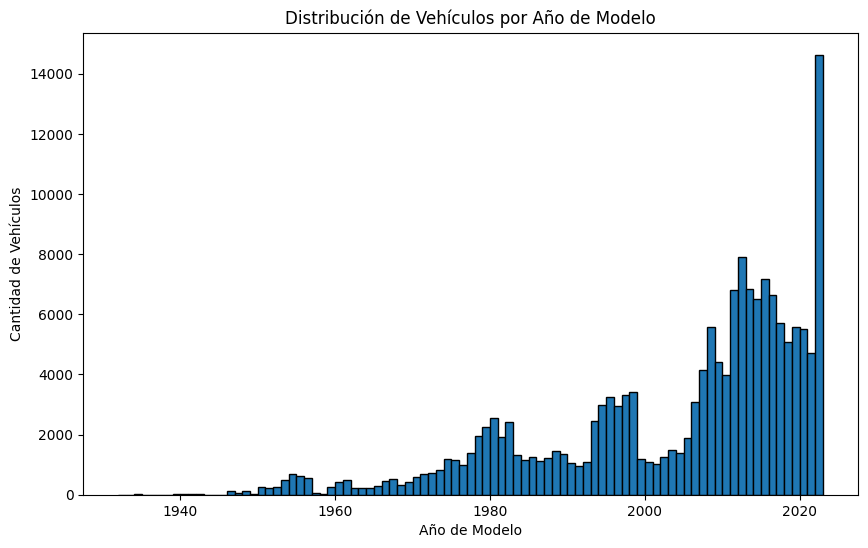

In [12]:
plt.figure(figsize=(10,6))
plt.hist(df['MODELO'], bins=range(1932, 2024, 1), edgecolor='black')
plt.title('Distribución de Vehículos por Año de Modelo')
plt.xlabel('Año de Modelo')
plt.ylabel('Cantidad de Vehículos')
plt.show()

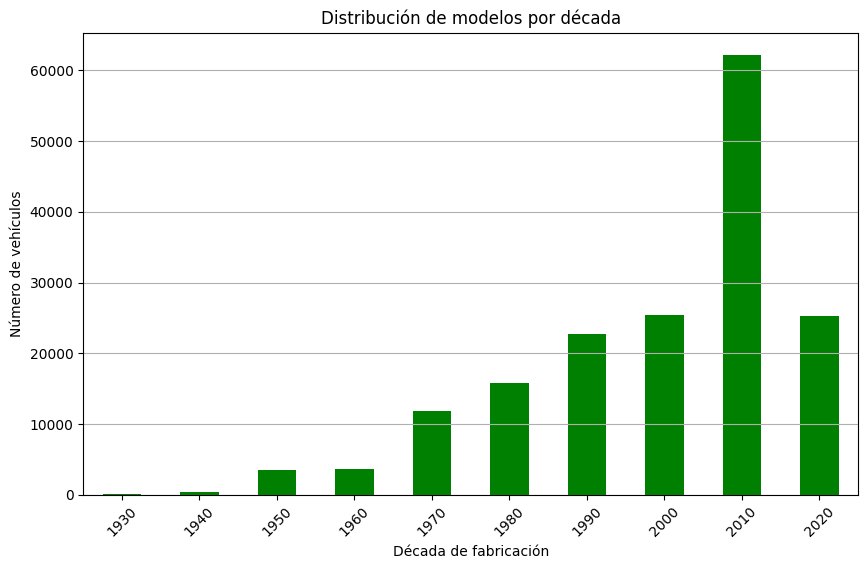

In [13]:
# Crear una columna de década
df['DECADA'] = (df['MODELO'] // 10) * 10

# Conteo por década
decade_counts = df['DECADA'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar', color='green')
plt.title('Distribución de modelos por década')
plt.xlabel('Década de fabricación')
plt.ylabel('Número de vehículos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

La mayoría de los vehículos en el dataset fueron fabricados en las décadas  2000, 2010 y 2020. Esto sugiere que hay una alta prevalencia de vehículos relativamente nuevos en los diferentes
 municipios.

7.2. Cantidad de Vehículos por Municipio

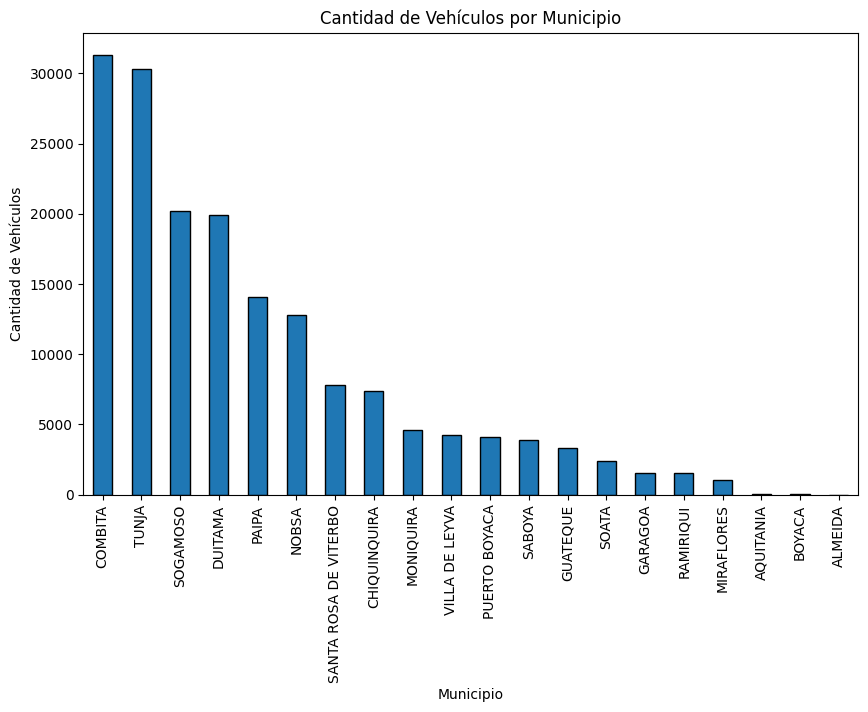

In [14]:
Count_Vehiculo = df['MUNICIPIO'].value_counts()
plt.figure(figsize=(10,6))
Count_Vehiculo.plot(kind='bar', edgecolor='black')
plt.title('Cantidad de Vehículos por Municipio')
plt.xlabel('Municipio')
plt.ylabel('Cantidad de Vehículos')
plt.show()

La distribución del parque automotor se evidencia en gran medida la mayoria de vehiculos estan ubicados en los principales municipios como Combita, Tunja ; Sogamoso y Duitama. Y se logra evidnciar que en estos municipios existe un mayor flujo de personas que se movilizan.

7.3. Promedio de Pasajeros por Tipo de Vehículo

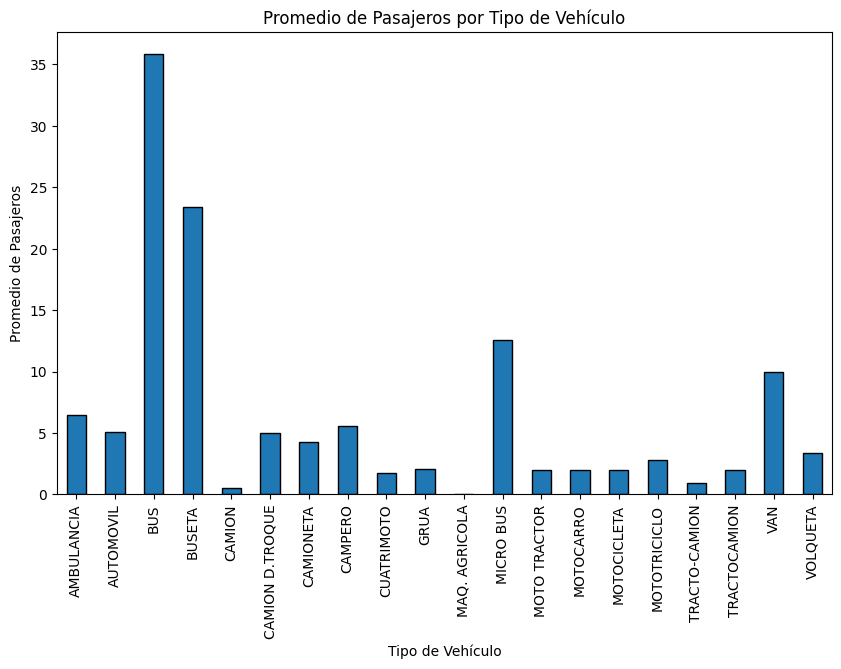

In [15]:
Pasajeros = df.groupby('CLASE')['PASAJEROS'].mean()
plt.figure(figsize=(10,6))
Pasajeros.plot(kind='bar', edgecolor='black')
plt.title('Promedio de Pasajeros por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Promedio de Pasajeros')
plt.show()

Logramos evidenciar que efectivamente los vehiculos con mayor numero de pasajeros son los Buses, Busetas Y Micro buses que son los vehiculos que mas transitan en los diferentes municipios para ayudar al dezplazamiento de las personas.

# 7.4. Distribución de Vehículos Importados vs No Importados

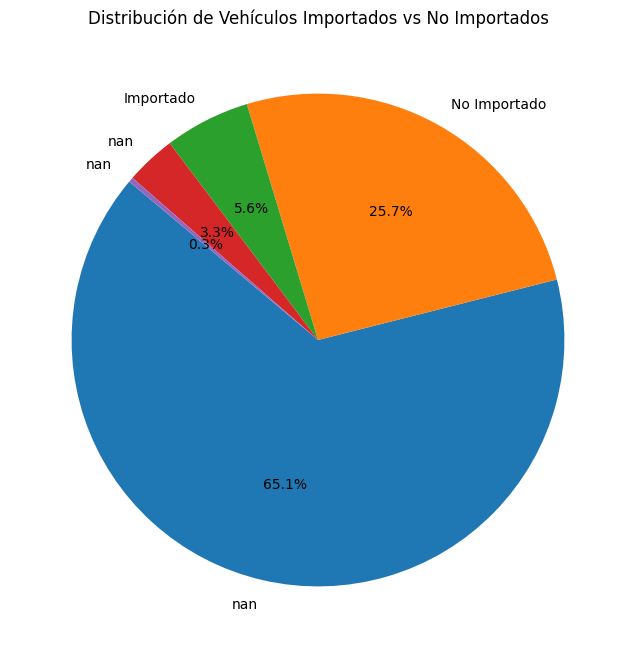

In [18]:
# Contar los valores de la columna 'IMPORTADO'
imported_count = df['IMPORTADO'].value_counts()

# Obtener las etiquetas directamente de los valores únicos en 'IMPORTADO'
labels = imported_count.index.map({'N': 'No Importado', 'S': 'Importado'})

# Graficar el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(imported_count, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Vehículos Importados vs No Importados')
plt.show()

La gráfica muestra que una mayoría significativa de los vehículos en el dataset no son importados (aproximadamente el 25.7%), mientras que alrededor del 5.7% son importados. Esto evidencia una mayor presencia de vehículos nacionales en los municipios analizados.

8. Lectura del segundo Dataset en el que involucramos la latitud y logitud de los diferentes Municipios con el fin de identificar y ubicar la informacion en el respectivo Mapa de Colombia

In [36]:
df2 = pd.read_csv('/content/Longitud y Latitud Municipios.csv', encoding='latin1', sep=';')

In [37]:
df2

,Ciudad/Pueblo,Latitud,Longitud
0,ALMEIDA,49.711,733.808
1,AQUITANIA,55.197,728.847
2,BOYACÁ,54.542,733.628
3,CHIQUINQUIRÁ,56.181,738.195
4,CÓMBITA,55.789,733.208
5,DUITAMA,58.241,730.343
6,GARAGOA,50.822,733.650
7,GUATEQUE,50.006,734.728
8,MIRAFLORES,51.967,731.447
9,MONIQUIRÁ,58.761,735.711


In [38]:
# Renombrar las columnas del segundo DataFrame para que coincidan con las del primer DataFrame
df2.rename(columns={'Ciudad/Pueblo': 'MUNICIPIO'}, inplace=True)

9. Procedemos arealizar la respectiva union de los datasets

In [47]:
# Realizar la unión (merge) de los DataFrames
merged_df = pd.merge(df, df2, on='MUNICIPIO', how='left')

In [58]:
print(merged_df)

                    MUNICIPIO      CLASE        MARCA  \
1                    SOGAMOSO  AUTOMOVIL    CHEVROLET   
2                       PAIPA  CAMIONETA      MERCURY   
3                       TUNJA    CAMPERO  JEEP WILLYS   
4       SANTA ROSA DE VITERBO  CAMIONETA     PLYMOUHT   
5                       NOBSA    CAMPERO       NISSAN   
...                       ...        ...          ...   
170662               SOGAMOSO  AUTOMOVIL      RENAULT   
170663               SOGAMOSO  CAMIONETA    CHEVROLET   
170664               SOGAMOSO  AUTOMOVIL        MAZDA   
170665               SOGAMOSO  AUTOMOVIL      RENAULT   
170666               SOGAMOSO  AUTOMOVIL      RENAULT   

                            LINEA  MODELO     CARROCERIA  PASAJEROS  TONELAJE  \
1                          IMPALA    1959          COUPE          5      0.00   
2                       SIN LINEA    1950         ESTACA          0      1.00   
3                   STATION WAGON    1964  STATION WAGON          5     

10. Procedemos a realizar la limpieza del dataset de valores nulos

In [51]:
# Filtrar filas con NaNs en las columnas Latitud y Longitud
merged_df = merged_df.dropna(subset=['Latitud', 'Longitud'])

11. Ejecutamos la opcion de sacar Muniocipios unicos para Marcar los Municipios en el mapa

In [73]:
municipios_unicos = merged_df.drop_duplicates(subset=['MUNICIPIO'])

In [74]:
municipios_unicos

,MUNICIPIO,CLASE,MARCA,LINEA,MODELO,CARROCERIA,PASAJEROS,TONELAJE,CILINDRAJE,SERVICIO,ESTADO,BLINDAJE,IMPORTADO,PUERTAS,DECADA,Latitud,Longitud
1,SOGAMOSO,AUTOMOVIL,CHEVROLET,IMPALA,1959,COUPE,5,0.00,2400,PARTICULAR,ACTIVO,N,S,2,1950,57.140,729.338
2,PAIPA,CAMIONETA,MERCURY,SIN LINEA,1950,ESTACA,0,1.00,1,PARTICULAR,ACTIVO,N,N,2,1950,57.793,731.180
3,TUNJA,CAMPERO,JEEP WILLYS,STATION WAGON,1964,STATION WAGON,5,0.00,2400,PARTICULAR,ACTIVO,N,N,2,1960,55.353,733.678
4,SANTA ROSA DE VITERBO,CAMIONETA,PLYMOUHT,VALIANT,1955,ESTACA,5,0.75,2200,PARTICULAR,ACTIVO,N,N,2,1950,58.742,731.922
5,NOBSA,CAMPERO,NISSAN,PATROL,1976,CABINADO,5,0.00,3000,PARTICULAR,ACTIVO,N,S,2,1970,57.700,729.428
7,DUITAMA,AUTOMOVIL,DODGE,CENECA,1961,SEDAN,5,0.00,2000,PARTICULAR,ACTIVO,N,S,4,1960,58.241,730.343
8,GUATEQUE,CAMIONETA,WILLYS,CJ 6,1963,STATION WAGON,5,0.00,1600,PARTICULAR,ACTIVO,N,N,2,1960,50.006,734.728
19,SABOYA,CAMPERO,NISSAN,PATROL LG 60 MT,1971,CABINADA CERRADA,5,0.00,3956,PARTICULAR,ACTIVO,0,0,2,1970,57.075,738.053
44,VILLA DE LEYVA,AUTOMOVIL,DODGE,1500,1947,SEDAN,5,0.00,1500,PARTICULAR,ACTIVO,0,0,5,1940,56.342,735.269
125,MIRAFLORES,CAMPERO,GAZ,GAZ,1967,CARPADO - LONA,5,0.00,2500,PARTICULAR,ACTIVO,N,N,2,1960,51.967,731.447


12. Procedemos a ejecutar la creacion del mapa con los respectivos municipios

In [75]:
# Crear el mapa con folium
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

In [76]:
# Añadir marcadores al mapa
for index, row in municipios_unicos.iterrows():
    folium.Marker([row['Latitud'], row['Longitud']], popup=row['MUNICIPIO']).add_to(mapa)

# Mostrar el mapa
mapa

12. Procedemos a descargar el Nuestro DataSet Final para utilizarlo en locker Studio y elaborar el respectivo Dashboard

In [62]:
from google.colab import files



In [68]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('DataSet Limpio.csv', index=False)
files.download('DataSet Limpio.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>